### Taller 5

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

In [3]:
df.head

<bound method NDFrame.head of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3

Coficicación de las variables cualitativas

In [4]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

Separamos los datos de entrenamiento y prueba

In [5]:
train = df.sample(frac=0.8, random_state=100)
test = df.drop(train.index)
print(train.shape)
print(test.shape)

(318, 10)
(80, 10)


Etiquetas

In [11]:
train_X = train[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
test_X = test[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [13]:
train_X.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight'], dtype='object')

In [14]:
import setuptools.dist # necesario en versión 3.12 de python
import tensorflow as tf

In [15]:
norm = tf.keras.layers.Normalization()

In [16]:
norm.adapt(np.array(train_X))

### Creación del modelo

In [18]:
dnn_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [20]:
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [21]:
%%time
history = dnn_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 24.4160 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 22.8136 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 21.9618 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.2549 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 20.6679 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 20.3990 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 19.3986 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.8412 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 17.9084 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 16.9176 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 15.7668 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step -

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [26]:
hist.head()

,loss,val_loss,epoch
0,23.766932,20.898445,0
1,22.966940,20.098450,1
2,22.166946,19.298458,2
3,21.366953,18.498463,3
4,20.566957,17.698467,4


In [27]:
import matplotlib.pyplot as plt

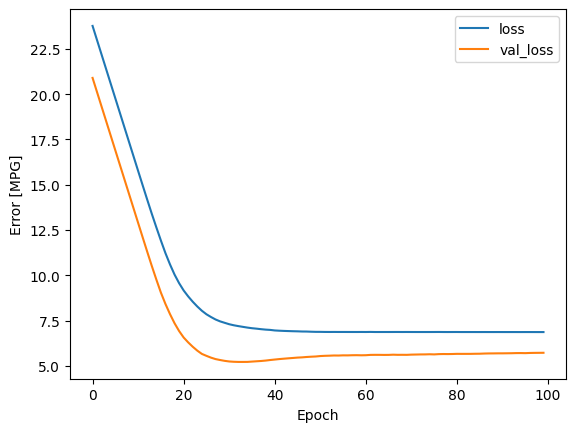

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()